# Informe caso práctico

In [1]:
getwd()

[1] "C:/Users/Joako/Documents/R_curso_analisis_datos/caso_practico_R/informe_jupyter"

El siguiente informe muestra el análisis realizado con la base de datos suministrada por la empresa bellabet sobre el registro de uso de dispositivos inteligentes de 33 personas durante el período de un mes. Los datos se expresan en distintas variables tales como: numero de pasos, calorías gastadas, intensidad de la actividad, tiempo de sueño, entre otras.
La idea es poder observar algunos patrones a partir del uso que hacen éstas personas a fin de poder identificar algunas oportunidades de mejora para mi interesada, la empresa Bellabet.

## Preguntas que guían el análisis

1. ¿La actividad física recopilada por los dispositivos inteligentes puede generar oportunidades de negocio?
2. ¿Cómo usan los dispositivos inteligentes los consumidores?
    + ¿Existen usuarios con poco o ningún uso del dispositivo?
    + ¿El uso del dispositivo en que medida está relacionado con la cantidad de actividad física realizada?
    + ¿Existe alguna relación entre el tiempo de sueño y la actividad física?
    + ¿Existe algún patrón en el uso de los dispositivos inteligentes?
        + Relación entre distancia y calorias gastadas
        + Relación entre la intensidad y las calorías gastadas
Luego de revisar cada uno de los data.frame. He decidido seleccionar los siguientes para el análisis ya que son los adecuados para responder a las preguntas que guían ésta investigación.

Tablas Seleccionadas               | Nombre data.frame       | Relación preguntas
-----------------------------------|-------------------------|--------------------
dailyActivity_merged.csv           | daily_activity          | Estimar el patron de uso del dispositivo
sleepDay_merged.csv                | sleep_day_df            | Cálcular el patron de sueño y el impacto en la actividad
minuteIntensitiesNarrow_merged.csv | min_intensities         | Escala de tiempo utilizado en cada nivel de intensidad
hourlyIntensities_merged.csv       | hourly_intensities      | Horas de mayor actividad física según intensidad y rel cal - int
hourlyCalories_merged.csv          | hourly_calories         | Relación gasto calórico e intensidad de la actividad. Merge df ant
minuteCaloriesNarrow_merged.csv    | min_calories            | Merge intensities_calories, comparar sujeto contra si, en gasto cal 

Una vez elegidas las tablas de la base de datos y su uso para el análisis; pasaré al proceso creación de cada data.frame de trabajo y limpieza y formateo de los mismos. Para ello instalaré los paquetes y librerías para formatear, manipular y transformar los datos:

Paquetes        | Librerías
----------------|------------------
tidyverse       | tidyverse
janitor         | janitor
skimr           | skimr
ggrepel         | ggrepel
N/A             | lubridate
N/A             | IRdisplay

Los paquetes, los instalo por separados porque me ha dado errores al instalarlos juntos

In [2]:
install.packages("tidyverse", dependencies = TRUE)

Installing package into 'C:/Users/Joako/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Joako\AppData\Local\Temp\Rtmpi4pPIY\downloaded_packages


In [3]:
install.packages("janitor")

Installing package into 'C:/Users/Joako/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'janitor' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Joako\AppData\Local\Temp\Rtmpi4pPIY\downloaded_packages


In [4]:
install.packages("skimr")

Installing package into 'C:/Users/Joako/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'skimr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Joako\AppData\Local\Temp\Rtmpi4pPIY\downloaded_packages


In [5]:
install.packages("ggrepel")

Installing package into 'C:/Users/Joako/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Joako\AppData\Local\Temp\Rtmpi4pPIY\downloaded_packages


In [6]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [7]:
library(janitor)

Warning message:
"package 'janitor' was built under R version 4.2.3"

Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test




In [8]:
library(skimr)

Warning message:
"package 'skimr' was built under R version 4.2.3"


In [9]:
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 4.2.3"


In [10]:
library(lubridate)

In [11]:
library(IRdisplay)

In [49]:
library(data.table)


Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




## Creación de los data frame a partir de las tablas seleccionadas

In [120]:
daily_activity <- 
    read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\dailyActivity_merged.csv")

sleep_day_df <- 
    read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\sleepDay_merged.csv")

min_intensities <- 
    read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\minuteIntensitiesNarrow_merged.csv")

hourly_intensities <- 
    read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\hourlyIntensities_merged.csv")

hourly_calories <-
    read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\hourlyCalories_merged.csv")

min_calories <- 
  read_csv("C:\\Users\\Joako\\Documents\\R_curso_analisis_datos\\caso_practico_R\\data\\minuteCaloriesNarrow_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1325580 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityMinute
dbl (2): Id, Intensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types

In [121]:
head(daily_activity)
head(sleep_day_df)
head(min_intensities)
head(hourly_intensities)
head(hourly_calories)
head(min_calories)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityMinute,Intensity
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0
1503960366,4/12/2016 12:01:00 AM,0
1503960366,4/12/2016 12:02:00 AM,0
1503960366,4/12/2016 12:03:00 AM,0
1503960366,4/12/2016 12:04:00 AM,0
1503960366,4/12/2016 12:05:00 AM,0


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


Id,ActivityMinute,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0.7865
1503960366,4/12/2016 12:01:00 AM,0.7865
1503960366,4/12/2016 12:02:00 AM,0.7865
1503960366,4/12/2016 12:03:00 AM,0.7865
1503960366,4/12/2016 12:04:00 AM,0.7865
1503960366,4/12/2016 12:05:00 AM,0.9438


### 1. Verificación de registros de usuarios y observaciones
Los datos recopilados son de 33 usuarios durante 30 días, con lo cual compruebo si los data.frame tienen el mismo numero de registro y mismos usarios

###### 1.1 Verificación registro de informantes cantidad por data.frame

In [122]:
n_unique(daily_activity$Id)
n_unique(sleep_day_df$Id)
n_unique(min_intensities$Id)
n_unique(hourly_intensities$Id)
n_unique(hourly_calories$Id)
n_unique(min_calories$Id)

[1] 33

[1] 24

[1] 33

[1] 33

[1] 33

[1] 33

###### 1.2 Verificación casos de informantes duplicados cantidad por data.frame

In [123]:
sum(duplicated(daily_activity))
sum(duplicated(sleep_day_df))
sum(duplicated(min_intensities))
sum(duplicated(hourly_intensities))
sum(duplicated(hourly_calories))
sum(duplicated(min_calories))

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

[1] 0

##### Tabla resumen casos únicos y duplicados

 Nombre data.frame     | Número se sujetos | Registros duplicados
-----------------------|-------------------|----------------------
daily_activity         | 33                | 0
sleep_day_df           | 24                | 3
min_intensities        | 33                | 0
hourly_intensities     | 33                | 0
hourly_calories        | 33                | 0
min_calories           | 33                | 0

En este resumen se puede comprobar que el data.frame sleep_day_df tiene 7 sujetos de los que no se tienen registros de tiempo de sueño y adicionalmente de los 24 sujetos existen 3 con registros duplicados con lo cual eliminaré esos registros duplicados.

###### 1.3 Remover duplicados de la tabla sleep_day_df

In [124]:
sleep_day_df <- sleep_day_df %>%
  distinct() %>%
  drop_na()

### 2. Formateo y estandarización de data.frame
La idea es que todas las columnas estén estandarizadas con respectos a sus *nombres*, *espaciado* y el *formato tolower*. Para todos los data.frame la columna que hace referencia a la fecha llevaran el nombre **date** y las que además de incluyen hora, minutos, segundos serán separadas en una nueva columna llamada **time**

##### 2.1 Limpiando espaciado columnas

In [125]:
clean_names(daily_activity)
clean_names(sleep_day_df)
clean_names(min_intensities)
clean_names(hourly_intensities)
clean_names(hourly_calories)
clean_names(min_calories)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_minute,intensity
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0
1503960366,4/12/2016 12:01:00 AM,0
1503960366,4/12/2016 12:02:00 AM,0
1503960366,4/12/2016 12:03:00 AM,0
1503960366,4/12/2016 12:04:00 AM,0
1503960366,4/12/2016 12:05:00 AM,0
1503960366,4/12/2016 12:06:00 AM,0
1503960366,4/12/2016 12:07:00 AM,0
1503960366,4/12/2016 12:08:00 AM,0


id,activity_hour,total_intensity,average_intensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000
1503960366,4/12/2016 6:00:00 AM,0,0.000000
1503960366,4/12/2016 7:00:00 AM,0,0.000000
1503960366,4/12/2016 8:00:00 AM,13,0.216667


id,activity_hour,calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48
1503960366,4/12/2016 6:00:00 AM,48
1503960366,4/12/2016 7:00:00 AM,47
1503960366,4/12/2016 8:00:00 AM,68


id,activity_minute,calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0.7865
1503960366,4/12/2016 12:01:00 AM,0.7865
1503960366,4/12/2016 12:02:00 AM,0.7865
1503960366,4/12/2016 12:03:00 AM,0.7865
1503960366,4/12/2016 12:04:00 AM,0.7865
1503960366,4/12/2016 12:05:00 AM,0.9438
1503960366,4/12/2016 12:06:00 AM,0.9438
1503960366,4/12/2016 12:07:00 AM,0.9438
1503960366,4/12/2016 12:08:00 AM,0.9438


##### 2.2 Formateando a minúsculas nombres de las columnas

In [126]:
daily_activity <- rename_with(daily_activity, tolower)
sleep_day_df <- rename_with(sleep_day_df, tolower)
min_intensities <- rename_with(min_intensities, tolower)
hourly_intensities <- rename_with(hourly_intensities, tolower)
hourly_calories <- rename_with(hourly_calories, tolower)
min_calories <- rename_with(min_calories, tolower)

###### 2.3 Formateando columna referida a fecha a tipo 'Date' con nombre date en algunos casos y en otros solo queda como caracter

In [127]:
# daily_activity
daily_activity <- daily_activity %>% 
  rename(date = activitydate) %>% 
  mutate(date = as.POSIXct(date,format ="%m/%d/%Y" , tz=Sys.timezone()))

daily_activity$date <- format(daily_activity$date, format = "%m-%d-%Y")

# sleep_day
sleep_day_df <- sleep_day_df %>%
  rename(date = sleepday)

sleep_day_df <- sleep_day_df %>%
  mutate(date = as.POSIXct(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

sleep_day_df$time <- format(sleep_day_df$date, format = "%H:%M:%S")
sleep_day_df$date <- format(sleep_day_df$date, format = "%m-%d-%Y")

# min_intensities, caso que se vuelve type date y ITime
min_intensities <- min_intensities %>% 
  rename(date = activityminute) %>% 
  mutate(date = as.POSIXct(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

min_intensities$time <- format(min_intensities$date, format = "%H:%M:%S")
min_intensities$date <- format(min_intensities$date, format = "%m-%d-%Y")

min_intensities$date <- as.Date(strptime(min_intensities$date, format = "%m-%d-%Y"))
min_intensities$time <- as.ITime(min_intensities$time, format = "%H:%M:%S")

# hourly_intensities
hourly_intensities <- hourly_intensities %>%
  rename(date = activityhour) %>%
  mutate(date = as.POSIXct(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

hourly_intensities$time <- format(hourly_intensities$date, format = "%H:%M:%S")
hourly_intensities$date <- format(hourly_intensities$date, format = "%m-%d-%y")

# hourly_calories
hourly_calories <- hourly_calories %>%
  rename(date = activityhour) %>%
  mutate(date = as.POSIXct(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
hourly_calories$time <- format(hourly_calories$date, format = "%H:%M:%S")
hourly_calories$date <- format(hourly_calories$date, format = "%m-%d-%y")

# min_calories
min_calories <- min_calories %>% 
  rename(date = activityminute) %>% 
  mutate(date = as.POSIXct(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone())) %>%
  rename(averagecalories = calories)
min_calories$time <- format(min_calories$date, format = "%H:%M:%S")
min_calories$date <- format(min_calories$date, format = "%m-%d-%y")

## 3. Análisis de uso del dispositivo inteligente

Para el análisis del patrón de uso, utilizo el data.frame daily_activity para construir uno llamado daily_minutes_used en el que ubicaremos el uso que hicieron los sujetos informantes del dispositivo inteligente. En el proceso se construye una escala de uso: *bajo*, *moderado*, *regular*, *alto* totalizando los minutos de actividad desde sedentary, hasta veryactive.

In [128]:
daily_minutes_used <- daily_activity %>%
  group_by(id, date) %>%
  mutate(minutesused = sum(veryactiveminutes, fairlyactiveminutes, lightlyactiveminutes, sedentaryminutes))

##### 3.1 Filtrando a los sujetos con cero uso
La idea es ubicar si alguno de los sujetos no uso durante estos 30 días el dispositivo inteligente

In [129]:
daily_minutes_used %>%
  group_by(id, date) %>%
  filter(minutesused <= 1)

id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,minutesused
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


No hay ningún sujeto que no usuara el dispositivo inteligente, todos los usaron en mayor o menor medida. Lo cual indica que los dispositivos una vez adquirido siempre son usados por las personas.

##### 3.2 Descubriendo a los sujetos con menor uso diario del dispositivo inteligente

In [130]:
min_df_uso <- daily_minutes_used %>%
  group_by(date) %>%
  filter(minutesused == min(minutesused)) %>%
  select(id, date, minutesused) %>%
  arrange(date)
View(min_df_uso)

id,date,minutesused
<dbl>,<chr>,<dbl>
1927972279,04-12-2016,789
6962181067,04-13-2016,722
2026352035,04-14-2016,850
1844505072,04-15-2016,703
8378563200,04-16-2016,790
8378563200,04-17-2016,692
5553957443,04-18-2016,828
6117666160,04-19-2016,905
5553957443,04-20-2016,746


Aquí se puede observar que existen algunas personas con un uso bajo del dispositivo inteligente

##### 3.3 Destacando a aquellos un con un uso bajo. Son 5 personas

In [131]:
min_df_uso %>%
    group_by(date) %>%
    filter(minutesused <= 150) %>%
    select(id, date, minutesused) %>%
    arrange(date)

id,date,minutesused
<dbl>,<chr>,<dbl>
2347167796,04-29-2016,6
7007744171,05-07-2016,111
8792009665,05-10-2016,48
3977333714,05-11-2016,26
4319703577,05-12-2016,2


##### 3.4 Construyendo la escala de uso
Esta escala tiene 4 niveles de uso: bajo, moderado, regular y alto

In [132]:
rango_uso <- daily_minutes_used %>%
  mutate(usertype = case_when(
    minutesused < 360 ~ "Bajo",
    minutesused >= 361 & minutesused < 719 ~ "Moderado",
    minutesused >= 720 & minutesused < 1079 ~ "Regular",
    minutesused >= 1080 ~ "Alto"
  )) 

##### 3.5 Totalizar la escala

In [133]:
rango_uso_percent <- rango_uso %>%
  group_by(usertype) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(usertype) %>%
  summarise(totalpercent = (total/totals)*100) %>%
  mutate(labels = paste(round(totalpercent, 2), "%"))

rango_uso_percent$usertype <- factor(rango_uso_percent$usertype, levels = c("Bajo", "Moderado", "Regular", "Alto"))
View(rango_uso_percent)

usertype,totalpercent,labels
<fct>,<dbl>,<chr>
Alto,60.6382979,60.64 %
Bajo,0.9574468,0.96 %
Moderado,1.7021277,1.7 %
Regular,36.7021277,36.7 %


##### 3.6 Exportar datos
Los datos se exportan para realizar gráfico de visualización de datos en tableau

In [ ]:
write.csv(rango_uso_percent, "rango_uso_percent.csv", row.names = FALSE)

##### G.1 Porcentaje de uso del dispositivo inteligente

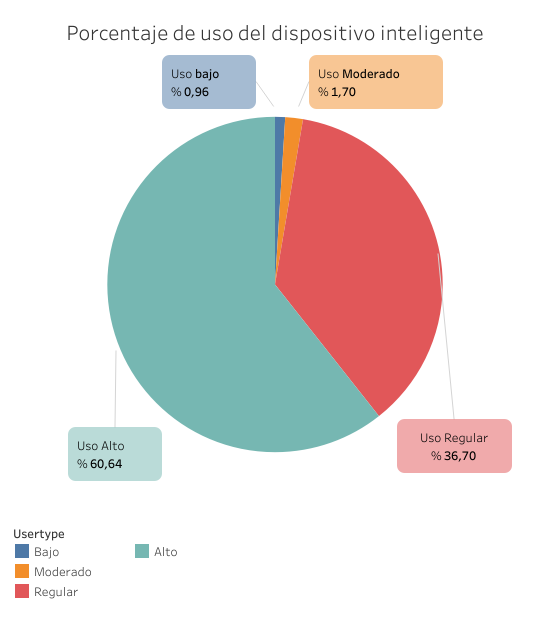

In [73]:
display_png(file="C:/Users/Joako/Documents/R_proyectos/Caso_practico/Informe_jupyter/Imagenes/Porcentaje_uso.png")

Quizás incluir una relación entre rango de uso y la actividad física

Termine de pasar uso del dispositivo. Pero noté que las url se vinculan con los archivos anteriores, quizás moficar mañana

## 4. Horas de mayor actividad física

In [134]:
intensities <- hourly_intensities %>%
  group_by(time) %>%
  summarise(avg_intensity = mean(averageintensity))

##### G.2 Patrón de horas de mayor actividad física

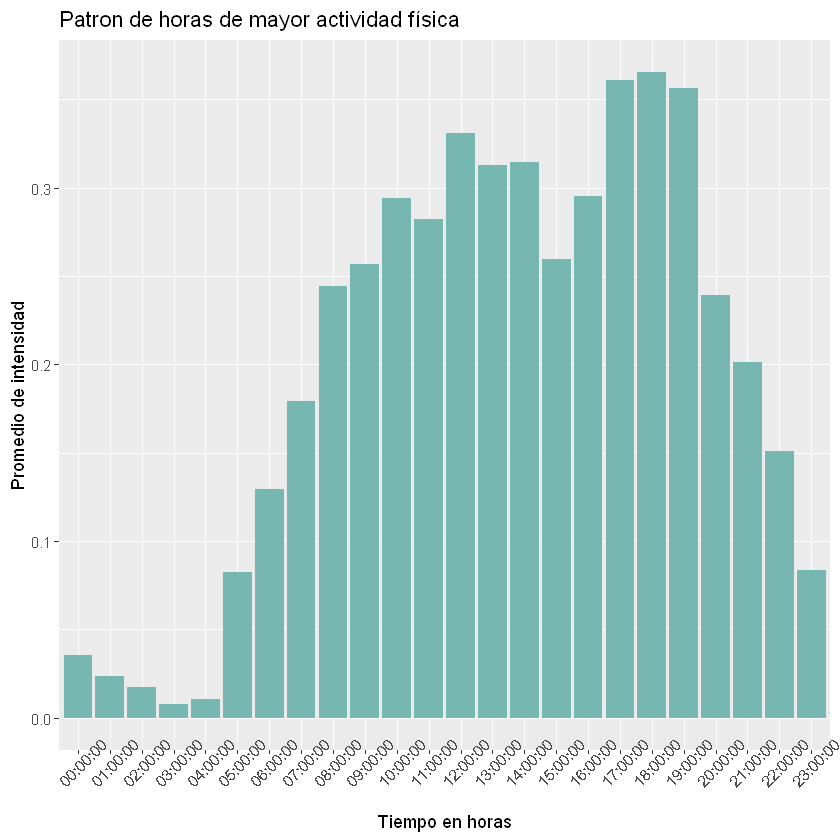

In [135]:
ggplot(intensities, aes(x = time, y = avg_intensity)) +
  geom_bar(stat = "identity", fill = "#76b7b2") +
  theme(axis.text.x = element_text(angle = 45))+
  labs(title = "Patron de horas de mayor actividad física ",
       x = "Tiempo en horas", y = "Promedio de intensidad")

Se puede observar que las horas de mayor actividad física durante el día se corresponde en primer lugar entre las 17:00 y las 19:00 seguido de las 12:00 a las 14:00. Aquí es donde se agrupan la mayor cantidad de usuarios.

Hasta ahora hemos aprendido que el 97% aprox de las personas durante el período del registro de información utilizaron de en una rango regular-alto el dispositivo inteligente. Y además su patrón de mayor actividad durante el día fue de 12:00 a 14:00 y de 17:00 a 19:00 siendo este último bloque el de mayor concentración de personas haciendo actividad física.

En las próximas líneas, nos centraremos en algunos aspectos más específicos, que nos ayuden a descubrir algunos otros patrones que puedan ser relevantes para Bellabet en su planificación de la campaña de marketing

### 5. Comparación del gasto calórico diario de cada persona contra su media mensual

##### 5.1 Crear data.frame a partir de merge de hourly_calories y hourly_intensities
El objetivo es comparar el gasto calórico diario de cada persona durante los 30 días contra su propia media mensual y reflejar como su actividad física diaria se ubicaba por debajo o por encima.
El data.frame intensities_calories fue creado previamente y ahora creare otro

In [136]:
intensities_calories <- merge(hourly_calories, hourly_intensities, by =c("id", "date", "time"))

In [137]:
calorias_mismo <- merge(min_calories, intensities_calories, by=c("id", "date", "time"))

##### 5.2 Crear data.frame group_calories
agrupando por id el gasto calórico

In [138]:
group_calories <- calorias_mismo %>%
  select(id, date, calories) %>%
  group_by(id, date)%>%
  summarise(totaldiaria = sum(calories), 
            .groups = "drop")

In [139]:
calories_id <- aggregate(totaldiaria ~ id + date, group_calories, mean)
head(calories_id) 

,id,date,totaldiaria
,<dbl>,<chr>,<dbl>
1,1503960366,04-12-16,1988
2,1624580081,04-12-16,1433
3,1644430081,04-12-16,3200
4,1844505072,04-12-16,2031
5,1927972279,04-12-16,2195
6,2022484408,04-12-16,2386


##### 5.2 Creación nueva columna llamada rendimiento con dos rangos por encima o por debajo

In [140]:
group_calories$rendimiento <- 
  ifelse(group_calories$totaldiaria > calories_id$totaldiaria, "encima", "debajo")

In [141]:
resumen <- table(group_calories$id, group_calories$rendimiento)

resumen <- as.data.frame.matrix(resumen)
colnames(resumen) <- c("encima", "debajo")
resumen$id <- rownames(resumen)

In [142]:
head(resumen)

,encima,debajo,id
,<int>,<int>,<chr>
1503960366,22,8,1503960366
1624580081,29,2,1624580081
1644430081,7,23,1644430081
1844505072,27,4,1844505072
1927972279,13,18,1927972279
2022484408,10,21,2022484408


##### 5.3 transforma a formato largo

In [102]:
resumen_larga <- pivot_longer(resumen, cols =c("debajo", "encima"), names_to = "tipo", values_to ="dias")

In [ ]:
write.csv(resumen_larga, "resumen_larga.csv", row.names = FALSE)

##### G.3 Gasto calórico diario de cada sujeto contra su media mensual

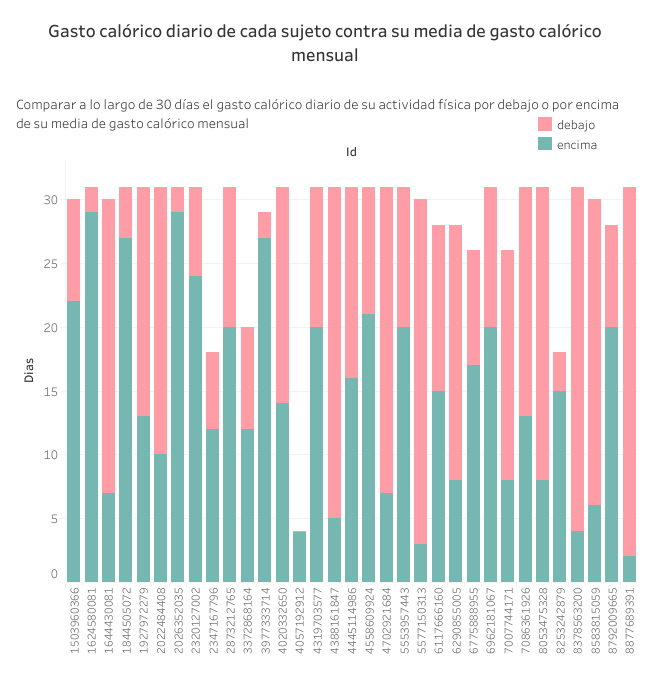

In [103]:
display_png(file="C:/Users/Joako/Documents/R_curso_analisis_datos/caso_practico_R/Informe_jupyter/Imagenes/Gasto_calorico_sujeto_contra_su_media.png")

### 6. Relación entre la intensidad de la actividad física y el gasto calórico
El objetivo es identificar una relación del gasto calórico con el nivel de intensidad de la actividad física

##### G.4 Relación entre la intensidad de la actividad física y el gasto calórico

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


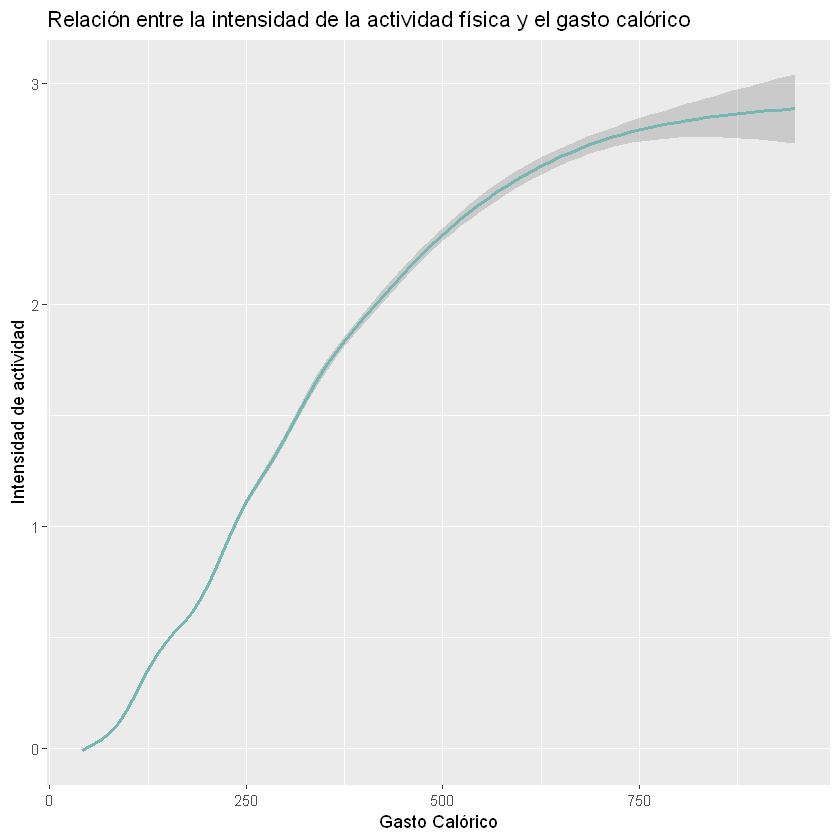

In [105]:
ggplot(data=intensities_calories)+
  geom_smooth(mapping = aes(x=calories, y= averageintensity), color="#76b7b2")+
  labs(title = "Relación entre la intensidad de la actividad física y el gasto calórico",
       x = "Gasto Calórico", y = "Intensidad de actividad")

En este gráfico se puede notar como existe una relación directa y positiva entre el gasto calórico y la intensidad de la actividad física. Mientras más intensa es la actividad es mayor el gasto calórico

### 6. Descripción del tiempo empleado en la actividad física y la intensidad de la misma

##### 6.1 Escala de intensidad

In [106]:
counts_0 <- min_intensities %>%
  group_by(id) %>%
  summarise(intensity_0 = sum(intensity == 0))

counts_1 <- min_intensities %>%
  group_by(id) %>%
  summarise(intensity_1 = sum(intensity == 1))

counts_2 <- min_intensities %>%
  group_by(id) %>%
  summarise(intensity_2 = sum(intensity == 2))


counts_3 <- min_intensities %>%
  group_by(id) %>%
  summarise(intensity_3 = sum(intensity == 3))

In [107]:
lista_df <- list(counts_0, counts_1, counts_2, counts_3)
escale_intensities_min <- Reduce(function(x, y) merge(x, y, by = c("id"), all = TRUE), lista_df)

##### 6.2 Resumen

In [143]:
escale_intensities_min %>%
  select(intensity_0, intensity_1, intensity_2, intensity_3) %>%
  summary()

  intensity_0     intensity_1    intensity_2      intensity_3    
 Min.   : 4861   Min.   : 410   Min.   :   6.0   Min.   :   3.0  
 1st Qu.:34125   1st Qu.:4433   1st Qu.: 110.0   1st Qu.: 111.0  
 Median :35532   Median :6140   Median : 318.0   Median : 286.0  
 Mean   :33700   Mean   :5482   Mean   : 386.3   Mean   : 601.2  
 3rd Qu.:37262   3rd Qu.:7256   3rd Qu.: 594.0   3rd Qu.: 726.0  
 Max.   :42899   Max.   :9562   Max.   :1838.0   Max.   :2640.0  

In [109]:
escale_avg <- escale_intensities_min %>%
  select(intensity_0, intensity_1, intensity_2, intensity_3) %>%
  summarise(avg_0 = mean(intensity_0), avg_1 = mean(intensity_1), avg_2 = mean(intensity_2), avg_3 = mean(intensity_3))

##### 6.3 Transformación formato largo

In [110]:
escale_avg_long <- escale_avg %>%
  pivot_longer(cols = starts_with("avg"), names_to = "intensity", values_to = "mean")

In [111]:
write.csv(escale_avg_long, "escale_avg_long.csv", row.names = FALSE)

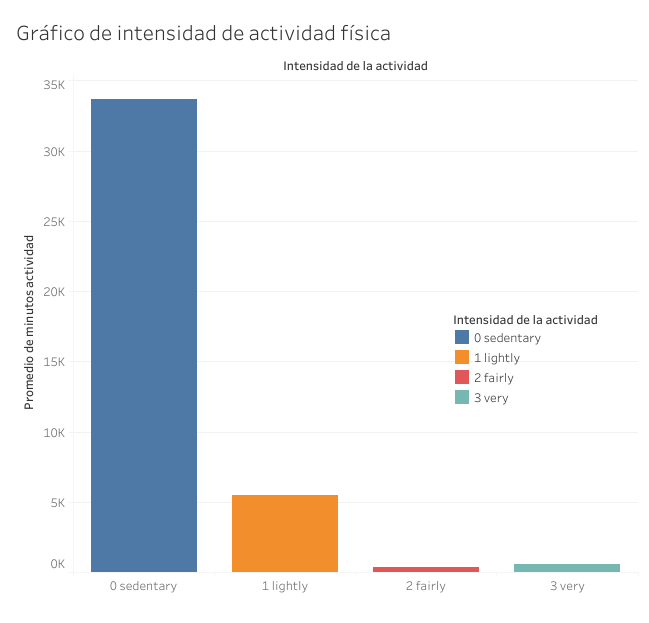

In [113]:
display_png(file="C:/Users/Joako/Documents/R_curso_analisis_datos/caso_practico_R/Informe_jupyter/Imagenes/Duracion_intensidad.png")

### 7. Análisis e identificación de patrón de sueño

In [114]:
sleep <- sleep_day_df %>%
  select(id, date, totalsleeprecords, totalminutesasleep, totaltimeinbed)

##### 7.1 Resumen patrón de sueño

In [115]:
sleep_summary <- sleep %>%
  select( totalsleeprecords, totalminutesasleep, totaltimeinbed) %>%
  summary()
View(sleep_summary)

 totalsleeprecords totalminutesasleep totaltimeinbed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

### 7.2 Determinar si existe una relación entre una, dos o tres sesiones de sueño y la actividad física

##### 7.2.1 Fusionar sleep_day_df y daily_activity

In [144]:
activity_sleep <- merge(sleep_day_df, daily_activity, by =c("id", "date"))

In [145]:
head(activity_sleep)

,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed,time,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,04-12-2016,1,327,346,00:00:00,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04-13-2016,2,384,407,00:00:00,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04-15-2016,1,412,442,00:00:00,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04-16-2016,2,340,367,00:00:00,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04-17-2016,1,700,712,00:00:00,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04-19-2016,1,304,320,00:00:00,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


In [146]:
sleep_activity <- activity_sleep %>%
  select(id, date, totalsleeprecords, totalsteps) %>%
  group_by(totalsleeprecords) %>%
  summarise(avg = mean(totalsteps))
head(sleep_activity)

totalsleeprecords,avg
<dbl>,<dbl>
1,8750.893
2,6725.930
3,5524.333


##### G.5 Relación entre registros de sueños(siestas) y pasos dados

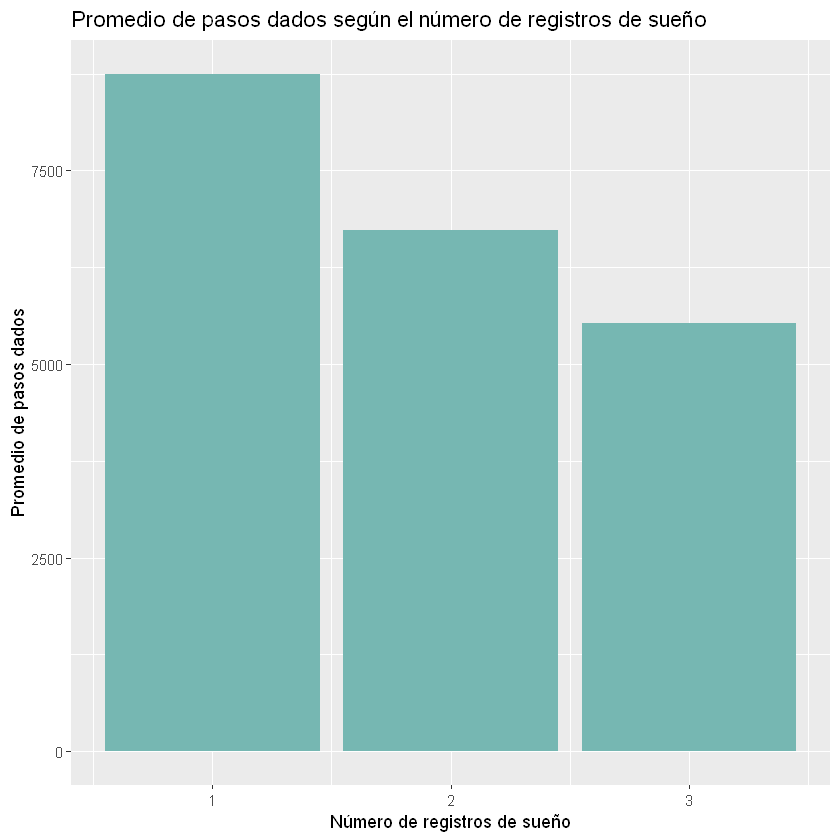

In [ ]:
ggplot(sleep_activity, aes(x = totalsleeprecords, y = avg)) +
  geom_bar(stat = "identity", fill = "#76b7b2") +
  labs(title = "Promedio de pasos dados según el número de registros de sueño",
       x = "Número de registros de sueño", y = "Promedio de pasos dados")

##### G.6 Relación entre tiempo de sueños y pasos dados

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


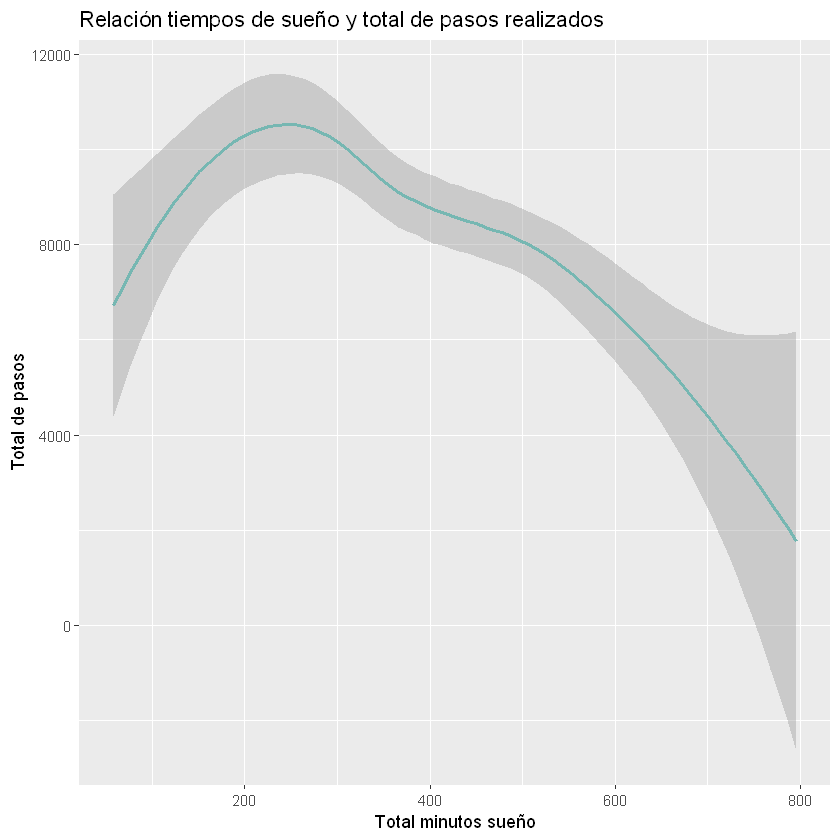

In [148]:

ggplot(data=activity_sleep)+
  geom_smooth(mapping = aes(x=totalminutesasleep, y= totalsteps), color="#76b7b2")+
  labs(title = "Relación tiempos de sueño y total de pasos realizados",
       x = "Total minutos sueño", y = "Total de pasos")